In [2]:
# necessary libaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# select numerical cols
selected_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea', 'SalePrice']
df = df[selected_cols]
df

,LotFrontage,LotArea,MasVnrArea,GrLivArea,GarageArea,PoolArea,SalePrice
0,65.0,8450,196.0,1710,548,0,208500
1,80.0,9600,0.0,1262,460,0,181500
2,68.0,11250,162.0,1786,608,0,223500
3,60.0,9550,0.0,1717,642,0,140000
4,84.0,14260,350.0,2198,836,0,250000
...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,1647,460,0,175000
1456,85.0,13175,119.0,2073,500,0,210000
1457,66.0,9042,0.0,2340,252,0,266500
1458,68.0,9717,0.0,1078,240,0,142125


In [5]:
df.describe()

,LotFrontage,LotArea,MasVnrArea,GrLivArea,GarageArea,PoolArea,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,1515.463699,472.980137,2.758904,180921.195890
std,24.284752,9981.264932,181.066207,525.480383,213.804841,40.177307,79442.502883
min,21.000000,1300.000000,0.000000,334.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,1129.500000,334.500000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,1464.000000,480.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,1776.750000,576.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5642.000000,1418.000000,738.000000,755000.000000


In [6]:
df.isna().sum()

LotFrontage    259
LotArea          0
MasVnrArea       8
GrLivArea        0
GarageArea       0
PoolArea         0
SalePrice        0
dtype: int64

In [7]:
# select only 2 attributes and 1 target
# for 3d plot

drop_cols = ['LotFrontage', 'GarageArea', 'PoolArea', 'MasVnrArea']
df = df.drop(columns = drop_cols, axis = 1)
df.head()

,LotArea,GrLivArea,SalePrice
0,8450,1710,208500
1,9600,1262,181500
2,11250,1786,223500
3,9550,1717,140000
4,14260,2198,250000


<AxesSubplot:>

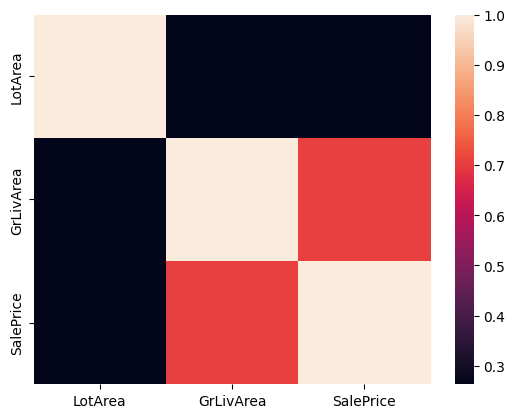

In [8]:
sns.heatmap(df.corr())

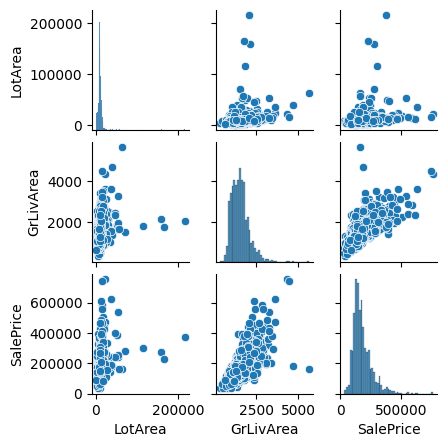

In [9]:
sns.pairplot(data = df, height=1.5)

In [10]:
# data preparation

X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

In [11]:
# multiple linear regression model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# fit lr model
lr.fit(X_train, y_train)

# predict
y_pred_lr = lr.predict(X_test).round(0)

In [12]:
# polynomial linear regression model

from sklearn.preprocessing import PolynomialFeatures

# set up polynomial degree
poly = PolynomialFeatures(degree = 2) 

# transform X into poly before fitting
X_poly_train = poly.fit_transform(X_train)

# fit ploy lr model with train set
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)

# predict
X_poly_test = poly.fit_transform(X_test)
y_pred_poly = lr_poly.predict(X_poly_test).round(0)

In [13]:
# pred and target
df2 = pd.DataFrame()
df2['y_pred_lr'] = y_pred_lr
df2['y_pred_poly'] = y_pred_poly
df2['y_test'] = y_test

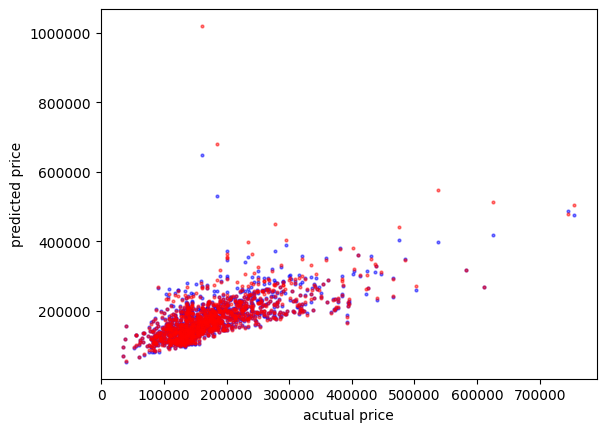

In [14]:
fig, ax = plt.subplots()

from matplotlib.ticker import StrMethodFormatter, NullFormatter
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_minor_formatter(NullFormatter())

plt.scatter(x = y_test, y = y_pred_lr, c = 'b', alpha = 0.5, s = 4)
plt.scatter(x = y_test, y = y_pred_poly, c = 'r', alpha = 0.5, s = 4)

ax.set_xlabel('acutual price')
ax.set_ylabel('predicted price')

plt.show()

In [15]:
# Return the coefficient (R^2) of determination  of the prediction.
print('entire data score')

lr = LinearRegression()
lr.fit(X, y)
print(f'linear model: {lr.score(X,y)}')

X_poly = poly.fit_transform(X)
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y)
print(f'poly model: {lr_poly.score(X_poly,y)}')

print('training score')
print(f'linear model: {lr.score(X_train,y_train)}')
print(f'poly model: {lr_poly.score(X_poly_train,y_train)}')
print('testing score')
print(f'linear model: {lr.score(X_test,y_test)}')
print(f'poly model: {lr_poly.score(X_poly_test,y_test)}')

entire data score
linear model: 0.508583801640057
poly model: 0.528682033738927
training score
linear model: 0.5495190714959239
poly model: 0.542664172951612
testing score
linear model: 0.4996876574913548
poly model: 0.5256329039150567


In [16]:
print(X[:,0].max())
print(X[:,1].max())
print(y.max())

215245
5642
755000


In [18]:
# 3d plot
# https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

X = df[['LotArea', 'GrLivArea']].values.reshape(-1,2)
Y = df['SalePrice']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 215245, 20)
y_pred = np.linspace(0, 5642, 20)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

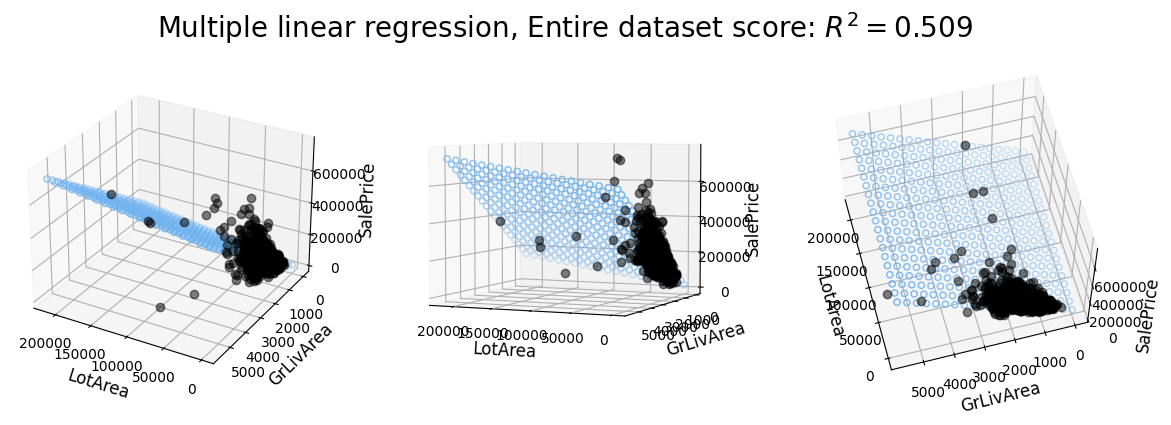

In [19]:
################################################ Train #############################################

lr = LinearRegression()
lr.fit(X, Y)
predicted = lr.predict(model_viz)

############################################## Evaluate ############################################

r2 = lr.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('LotArea', fontsize=12)
    ax.set_ylabel('GrLivArea', fontsize=12)
    ax.set_zlabel('SalePrice', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('Multiple linear regression, Entire dataset score: $R^2 = %.3f$' % r2, fontsize=20)

fig.tight_layout()

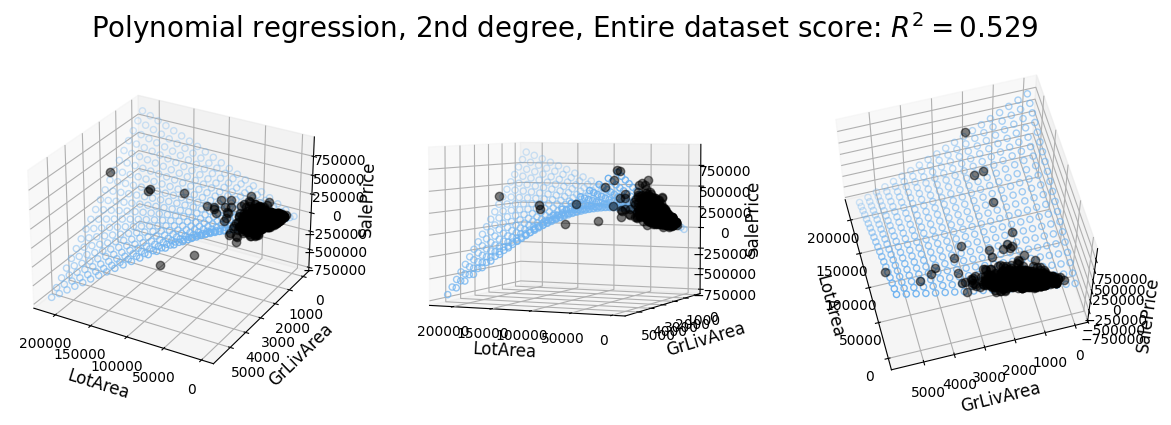

In [20]:
################################################ Train #############################################

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X)
lr_poly = LinearRegression()
lr_poly.fit(X_poly, Y)

predicted = lr_poly.predict(poly.fit_transform(model_viz))

############################################## Evaluate ############################################

r2 = lr_poly.score(poly.fit_transform(X), Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('LotArea', fontsize=12)
    ax.set_ylabel('GrLivArea', fontsize=12)
    ax.set_zlabel('SalePrice', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('Polynomial regression, 2nd degree, Entire dataset score: $R^2 = %.3f$' % r2, fontsize=20)

fig.tight_layout()

C:\Users\cjong\AppData\Local\Temp\ipykernel_29916\3683713715.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\cjong\AppData\Local\Temp\ipykernel_29916\3683713715.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\cjong\AppData\Local\Temp\ipykernel_29916\3683713715.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\cjong\AppData\Local\Temp\ipykernel_29916\3683713715.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\cjong\AppData\Local\Temp\ipykernel_29916\3683713715.py:42: UserWarning: Matplotlib is currently using m

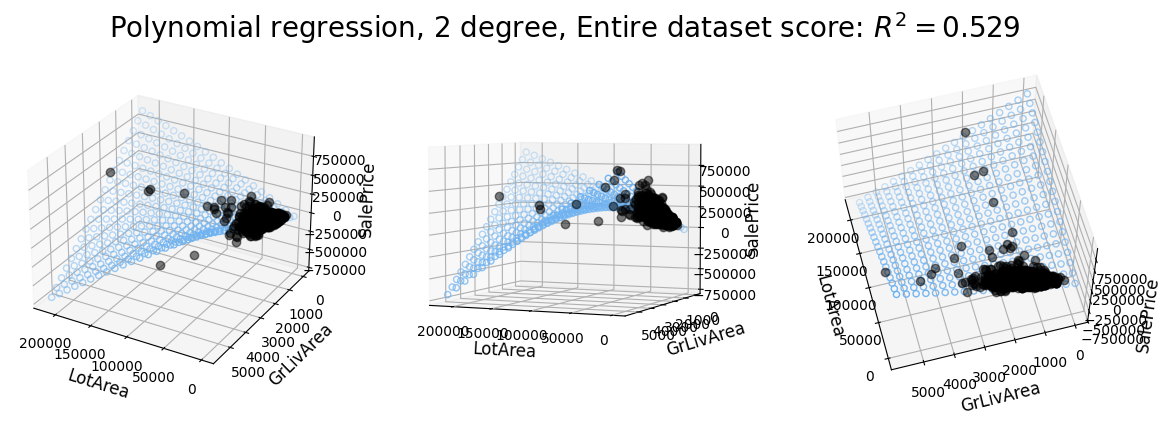

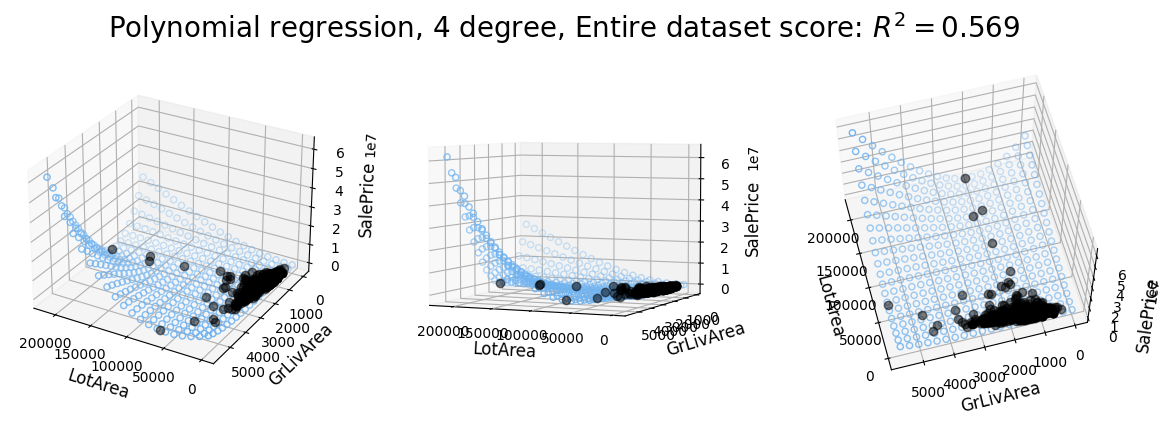

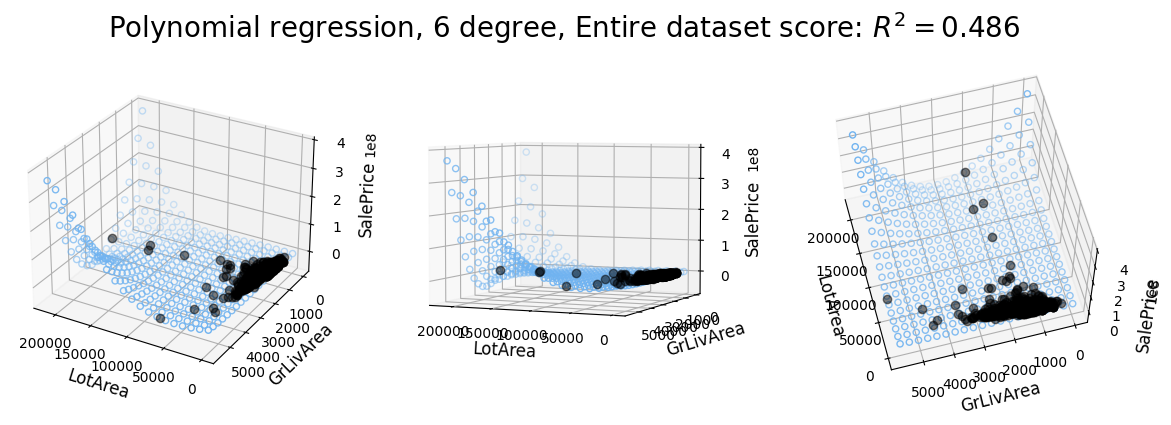

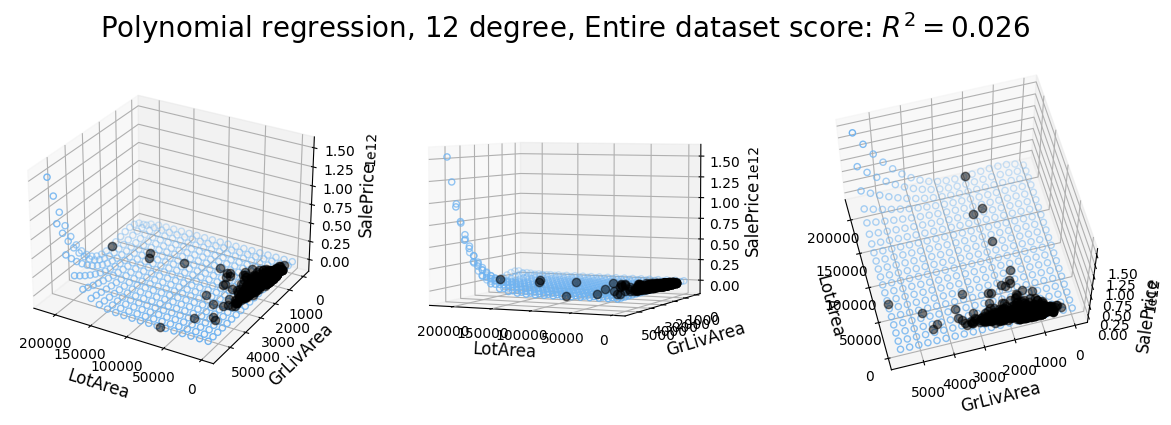

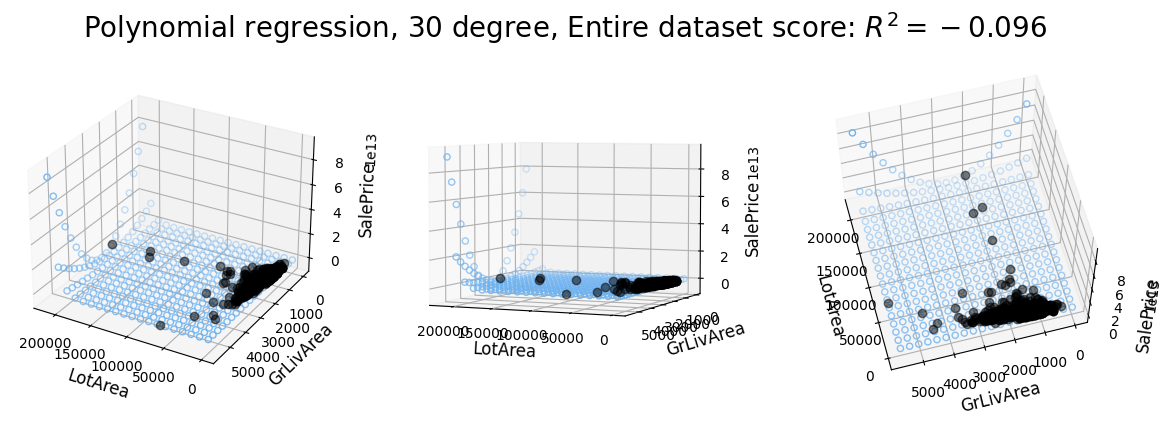

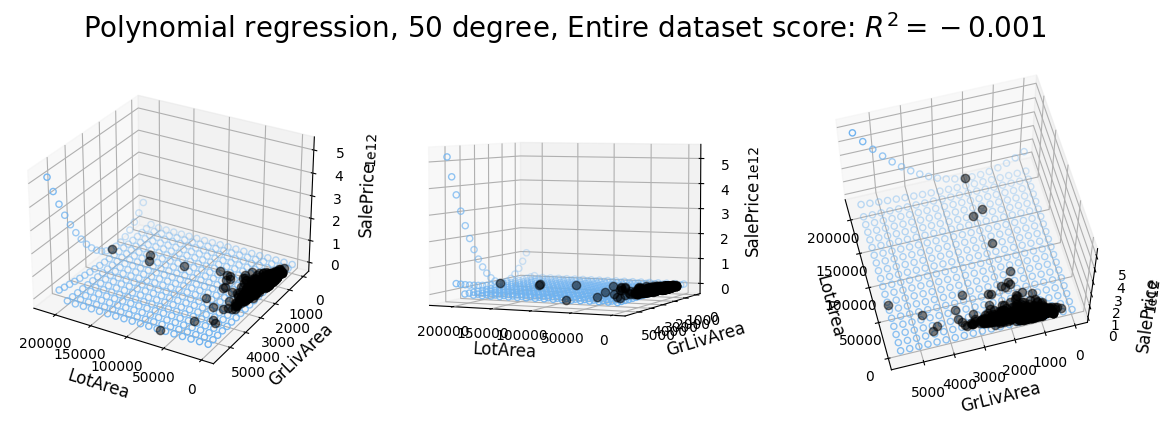

In [21]:
################################################ Train #############################################
for n_poly in [2,4,6,12,30,50]:
    poly = PolynomialFeatures(degree = n_poly) 
    X_poly = poly.fit_transform(X)
    lr_poly = LinearRegression()
    lr_poly.fit(X_poly, Y)

    predicted = lr_poly.predict(poly.fit_transform(model_viz))

    ############################################## Evaluate ############################################

    r2 = lr_poly.score(poly.fit_transform(X), Y)

    ############################################## Plot ################################################

    plt.style.use('default')

    fig = plt.figure(figsize=(12, 4))

    ax1 = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132, projection='3d')
    ax3 = fig.add_subplot(133, projection='3d')

    axes = [ax1, ax2, ax3]

    for ax in axes:
        ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
        ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
        ax.set_xlabel('LotArea', fontsize=12)
        ax.set_ylabel('GrLivArea', fontsize=12)
        ax.set_zlabel('SalePrice', fontsize=12)
        ax.locator_params(nbins=4, axis='x')
        ax.locator_params(nbins=5, axis='x')

    ax1.view_init(elev=28, azim=120)
    ax2.view_init(elev=4, azim=114)
    ax3.view_init(elev=60, azim=165)

    fig.suptitle('Polynomial regression, %s degree, Entire dataset score: $R^2 = %.3f$' % (n_poly, r2), fontsize=20)

    fig.tight_layout()
    fig.show()